In [15]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from rates import Kadonis

plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

In [16]:
kadonis1 = Kadonis(version=1)  # == Kadonis(Path.cwd().parent / "Data/kadonis_rrates_1.0.txt")

In [17]:
kadonis03 = Kadonis(version=0.3)  # == Kadonis(Path.cwd().parent / "Data/kadonis_rrates_0.3.txt")

In [18]:
kadonis1['ne20'] == kadonis03['ne20']

True

In [19]:
kadonis03.in_file("Ne20")

True

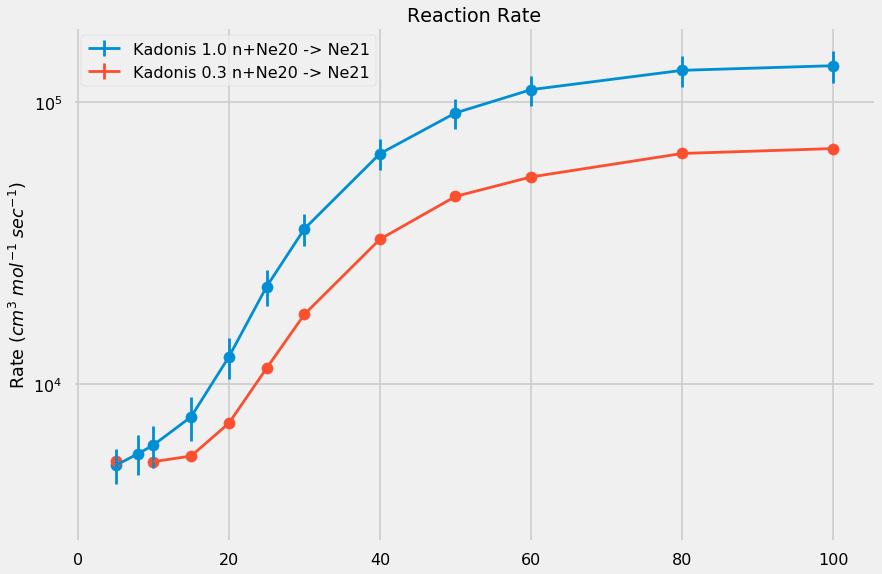

In [24]:
kadonis1['ne20'].mpl_plot(temp_unit="KeV")
kadonis03['ne20'].mpl_plot(temp_unit="KeV");

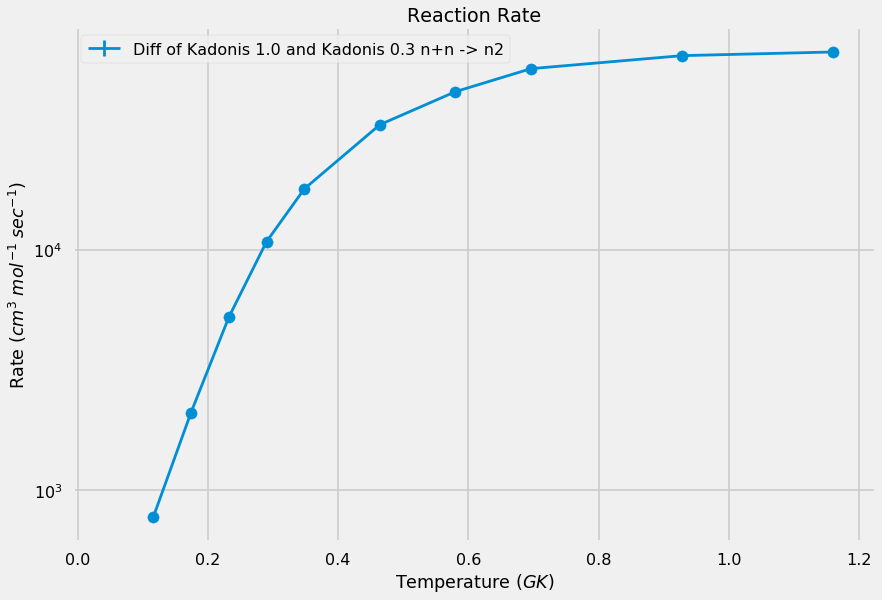

In [25]:
kadonis1["Ne20"].diff(kadonis03["NE20"]).mpl_plot();

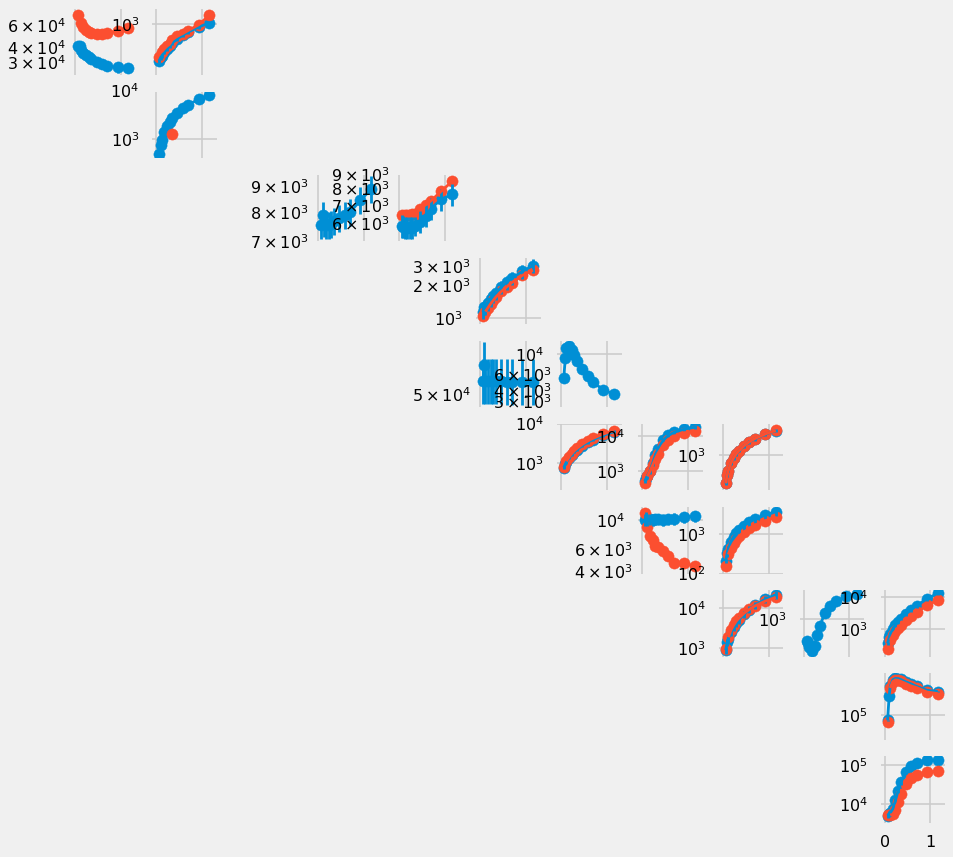

In [22]:
from rates import Isotope
def isotope_grid(x, y):


    x = Isotope.name(x).numbers()
    y = Isotope.name(y).numbers()
    x = (x[0], x[1]-x[0])
    y = (y[0], y[1]-y[0])

    x_axis = []

    for i in range(x[0], y[0]+1):
        x_axis.append([])
        for j in range(x[1], y[1]+1):
            x_axis[-1].append((i, j))

    return np.array(x_axis)

def mpl_plt_grid(isotopes_to_plot):
    
    iso_s = isotopes_to_plot.shape
    fig, axs= plt.subplots(iso_s[0],iso_s[1], sharex=True, figsize=(14, 14))

    for iso, ax in zip(isotopes_to_plot, axs):
        for i, a in zip(iso, ax):
            isotope = str(Isotope(i[0], i[1]+i[0]))
            if kadonis1.in_file(isotope):
                a = kadonis1[isotope].mpl_plot(a)
            if kadonis03.in_file(isotope):
                a = kadonis03[isotope].mpl_plot(a)
                
            if not (kadonis03.in_file(isotope) or kadonis1.in_file(isotope)):
                a.remove()
            else:
                a.set_title("")
                a.get_legend().remove()
                a.xaxis.label.set_visible(False)
                a.yaxis.label.set_visible(False)

mpl_plt_grid(isotope_grid("H1", "Ne20"))